In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
!ls

Dataset2.csv README.md    eda.ipynb


In [21]:
df = pd.read_csv('Dataset2.csv')

In [22]:
df

,Days,Advertiser verticals,Device categories,Creative size,Buyer networks,Revenue,Ad impressions,Ad eCPM (£)
0,6/1/20,Autos & Vehicles,Desktop,Native,Agency B,£39.58,48545,£0.82
1,6/1/20,Apparel,Desktop,300x250,Agency B,£9.04,47784,£0.19
2,6/1/20,Autos & Vehicles,High-end mobile devices,Native,Agency B,£44.58,45416,£0.98
3,6/1/20,Apparel,Desktop,970x250,Agency B,£8.61,27105,£0.32
4,6/1/20,"Hobbies, Games & Leisure",Desktop,300x250,Agency B,£4.80,22408,£0.21
...,...,...,...,...,...,...,...,...
29075,6/30/20,Home & Garden,High-end mobile devices,300x600,Agency D,£0.00,2,£1.61
29076,6/30/20,Law & Government,High-end mobile devices,300x600,Agency D,£0.00,2,£1.59
29077,6/30/20,Health,Connected TV,300x600,Agency B,£0.00,2,£1.38
29078,6/30/20,Travel & Tourism,Desktop,728x90,Agency D,£0.00,2,£1.31


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29080 entries, 0 to 29079
Data columns (total 8 columns):
Days                    29080 non-null object
Advertiser verticals    29080 non-null object
Device categories       29080 non-null object
Creative size           29080 non-null object
Buyer networks          29080 non-null object
Revenue                 29080 non-null object
Ad impressions          29080 non-null int64
Ad eCPM (£)             29080 non-null object
dtypes: int64(1), object(7)
memory usage: 1.8+ MB


In [28]:
df['Days'] = pd.to_datetime(df['Days'])

In [38]:
df['Ad eCPM (£)']= df['Ad eCPM (£)'].str.replace("£", " ")
df['Revenue']= df['Revenue'].str.replace("£", " ")

In [45]:
df['Ad eCPM (£)'] = df['Ad eCPM (£)'].astype(float)
df['Revenue'] = df['Revenue'].astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29080 entries, 0 to 29079
Data columns (total 8 columns):
Days                    29080 non-null datetime64[ns]
Advertiser verticals    29080 non-null object
Device categories       29080 non-null object
Creative size           29080 non-null object
Buyer networks          29080 non-null object
Revenue                 29080 non-null float64
Ad impressions          29080 non-null int64
Ad eCPM (£)             29080 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.8+ MB


# Buyer Network over time

In [83]:
# Prepare traffic data for variation by hour of the day (total)
pivot_agency = pd.pivot_table(df, values='Revenue', columns='Buyer networks', index = 'Days',
                             aggfunc=sum)


In [84]:
pivot_agency

Buyer networks,Agency A,Agency B,Agency C,Agency D,Agency E
Days,,,,,
2020-06-01,2.32,1123.14,159.08,0.97,10.41
2020-06-02,3.73,1017.98,148.89,0.35,28.76
2020-06-03,18.31,0.00,159.23,0.74,26.77
2020-06-04,0.89,462.83,76.38,0.17,5.28
2020-06-05,3.78,946.60,169.71,0.68,10.75
2020-06-06,2.74,861.77,141.74,0.79,12.68
2020-06-07,4.13,879.39,154.33,0.32,11.19
2020-06-09,23.50,958.03,228.55,0.34,14.51
2020-06-10,24.85,1044.20,252.81,0.23,13.44


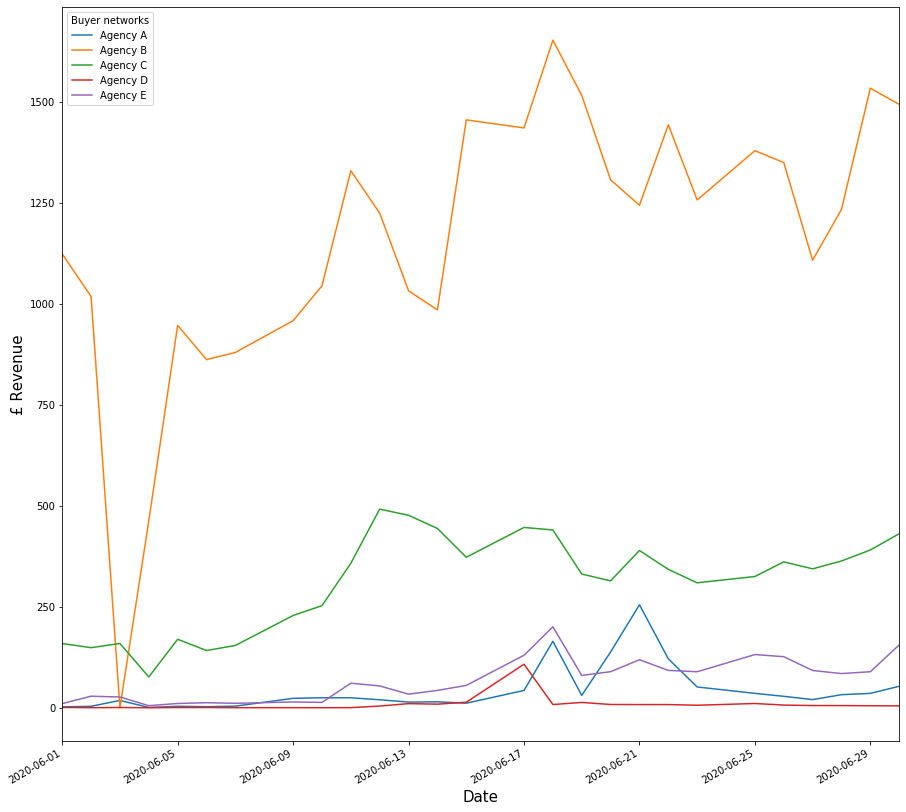

In [85]:
ax = pivothour_agency.plot(figsize=(15,15))
ylab = ax.set_ylabel('£ Revenue',fontsize=15)
xlab = ax.set_xlabel('Date',fontsize=15)

# Creative size overall

In [110]:
pivot_creative_rev = pd.pivot_table(df, values='Revenue', columns='Creative size',
                             aggfunc=sum)


In [111]:
pivot_creative_imp = pd.pivot_table(df, values='Ad impressions', columns='Creative size',
                             aggfunc=sum)

In [117]:
pivot_creative_cpm = pd.pivot_table(df, values='Ad eCPM (£)', columns='Creative size',
                             aggfunc=np.mean)

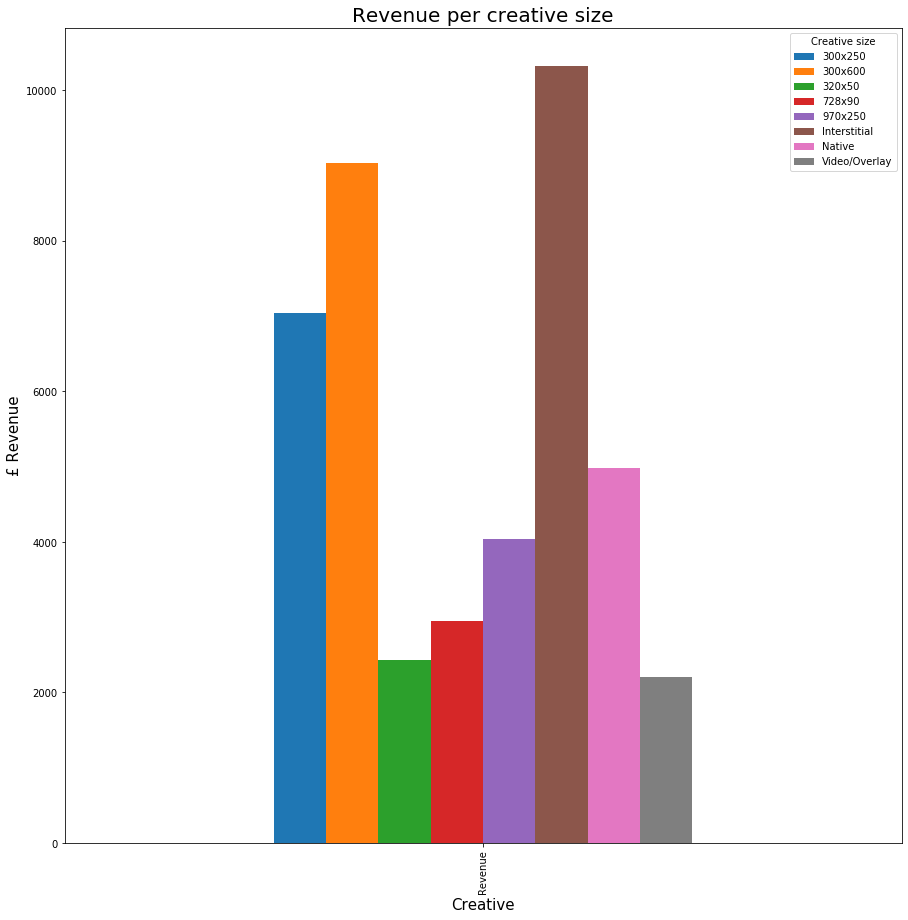

In [139]:
ax = pivot_creative_rev.plot(kind='bar',figsize = (15,15))
plt.title('Revenue per creative size', fontsize=20)
ylab = ax.set_ylabel('£ Revenue',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

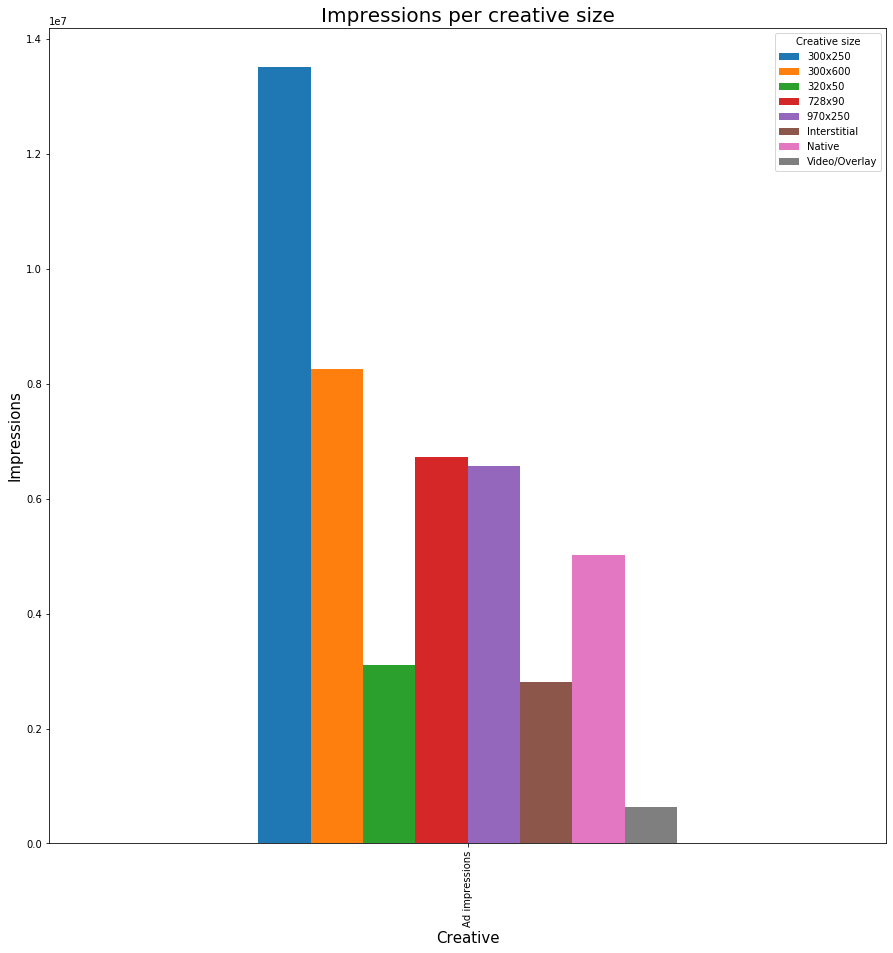

In [142]:
ax = pivot_creative_imp.plot(kind='bar',figsize = (15,15))
plt.title('Impressions per creative size', fontsize=20)
ylab = ax.set_ylabel('Impressions',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

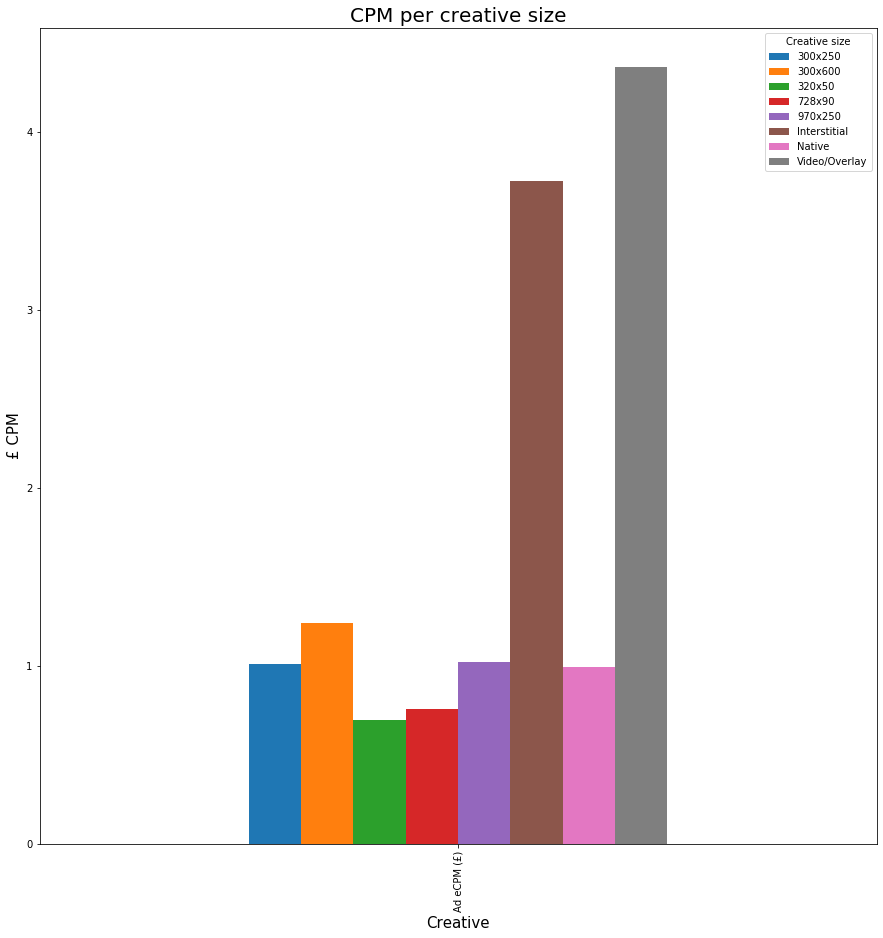

In [143]:
ax = pivot_creative_cpm.plot(kind='bar',figsize = (15,15))
plt.title('CPM per creative size', fontsize=20)
ylab = ax.set_ylabel('£ CPM',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

# Device Type Overall

In [144]:
pivot_device_rev = pd.pivot_table(df, values='Revenue', columns='Device categories',
                             aggfunc=sum)


In [145]:
pivot_device_imp = pd.pivot_table(df, values='Ad impressions', columns='Device categories',
                             aggfunc=sum)

In [146]:
pivot_device_cpm = pd.pivot_table(df, values='Ad eCPM (£)', columns='Device categories',
                             aggfunc=np.mean)

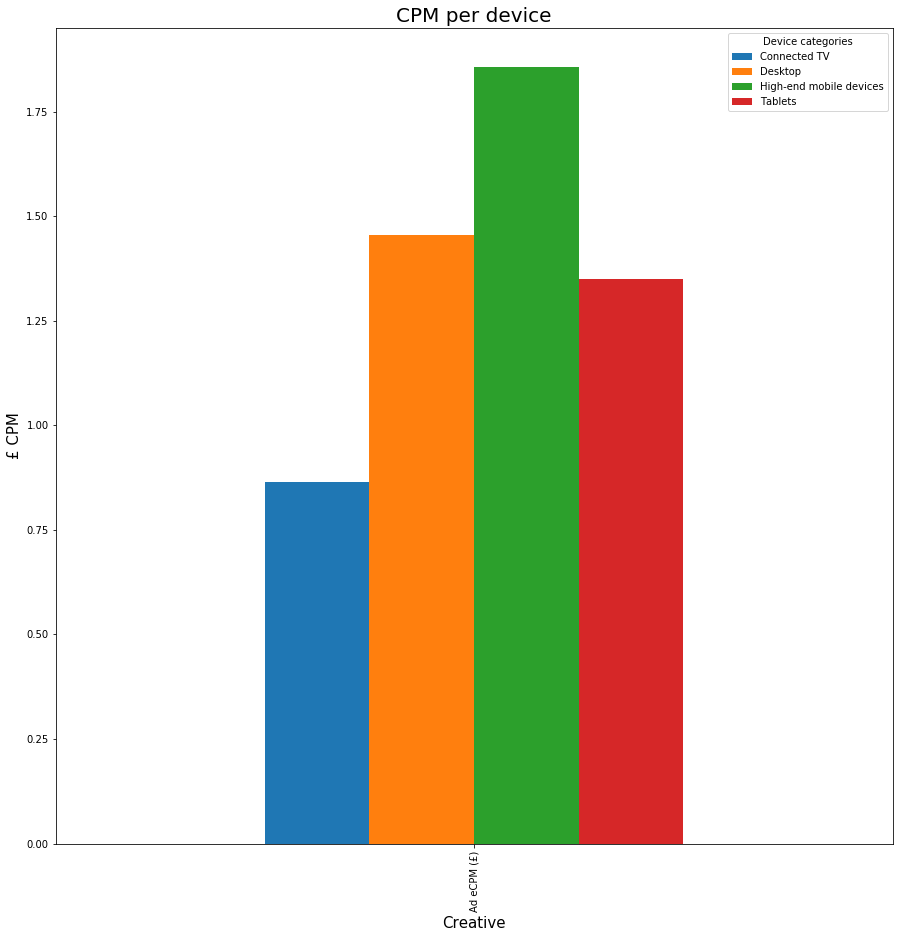

In [147]:
ax = pivot_device_cpm.plot(kind='bar',figsize = (15,15))
plt.title('CPM per device', fontsize=20)
ylab = ax.set_ylabel('£ CPM',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

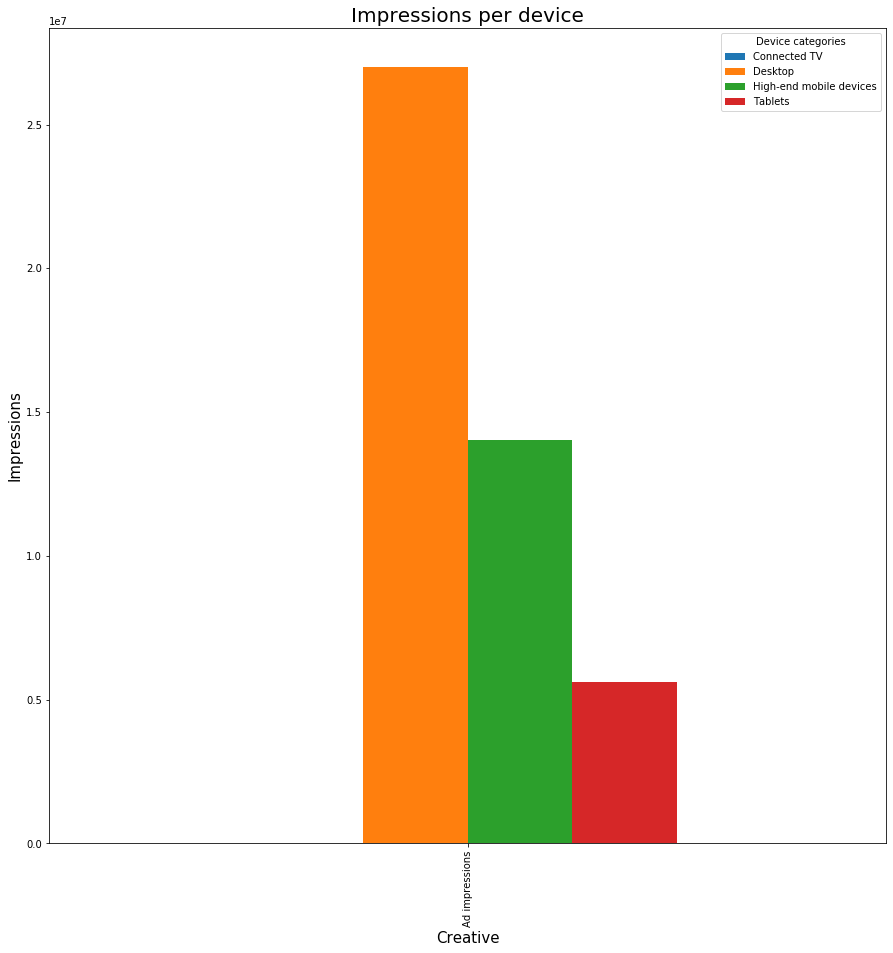

In [148]:
ax = pivot_device_imp.plot(kind='bar',figsize = (15,15))
plt.title('Impressions per device', fontsize=20)
ylab = ax.set_ylabel('Impressions',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

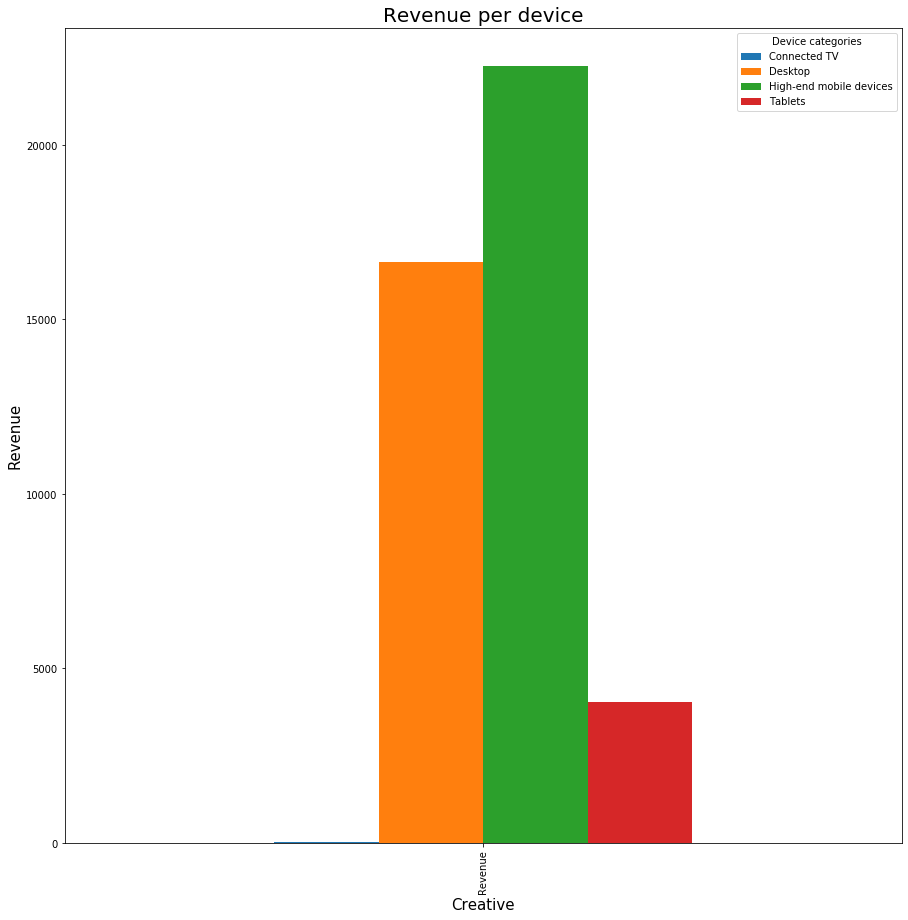

In [149]:
ax = pivot_device_rev.plot(kind='bar',figsize = (15,15))
plt.title('Revenue per device', fontsize=20)
ylab = ax.set_ylabel('Revenue',fontsize=15)
xlab = ax.set_xlabel('Creative',fontsize=15)
plt.show()

# Snapshot of Agency A

In [151]:
df_a = df.loc[df['Buyer networks']== 'Agency A']

In [152]:
df_a

,Days,Advertiser verticals,Device categories,Creative size,Buyer networks,Revenue,Ad impressions,Ad eCPM (£),Ad spend,Margin
317,2020-06-01,Apparel,High-end mobile devices,320x50,Agency A,0.67,645,1.05,0.67725,-0.00725
411,2020-06-01,Business & Industrial,Desktop,970x250,Agency A,0.39,315,1.25,0.39375,-0.00375
479,2020-06-01,Apparel,High-end mobile devices,300x250,Agency A,0.24,187,1.28,0.23936,0.00064
489,2020-06-01,Business & Industrial,High-end mobile devices,300x600,Agency A,0.18,173,1.01,0.17473,0.00527
495,2020-06-01,Apparel,High-end mobile devices,300x600,Agency A,0.23,165,1.39,0.22935,0.00065
...,...,...,...,...,...,...,...,...,...,...
29035,2020-06-30,Business & Industrial,Tablets,320x50,Agency A,0.00,3,1.26,0.00378,-0.00378
29042,2020-06-30,Apparel,Tablets,300x600,Agency A,0.00,3,0.67,0.00201,-0.00201
29058,2020-06-30,Autos & Vehicles,Desktop,970x250,Agency A,0.01,2,4.14,0.00828,0.00172
29068,2020-06-30,Apparel,Desktop,320x50,Agency A,0.00,2,2.30,0.00460,-0.00460


In [166]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 317 to 29073
Data columns (total 10 columns):
Days                    850 non-null datetime64[ns]
Advertiser verticals    850 non-null object
Device categories       850 non-null object
Creative size           850 non-null object
Buyer networks          850 non-null object
Revenue                 850 non-null float64
Ad impressions          850 non-null int64
Ad eCPM (£)             850 non-null float64
Ad spend                850 non-null float64
Margin                  850 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 73.0+ KB


## Creative Size 

In [213]:
creative_a = df_a.groupby('Creative size').agg(sum_rev=('Revenue', sum))

In [217]:
creative_a.sort_values(by='sum_rev',inplace=True)

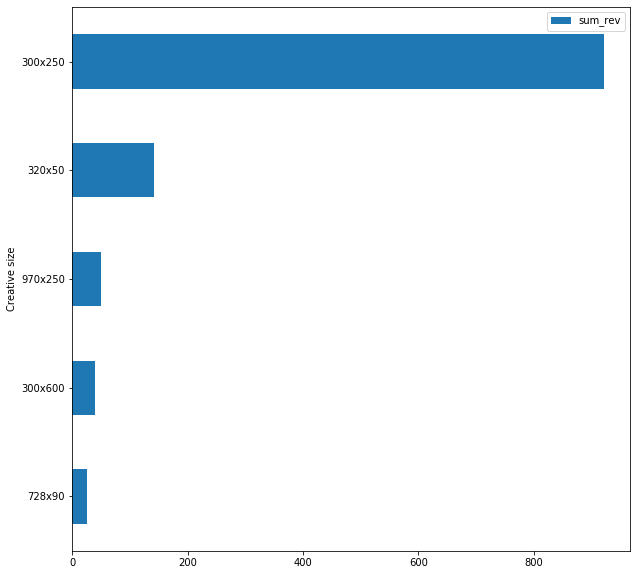

In [219]:
creative_a.plot(kind='barh',figsize=(10,10))
plt.show()

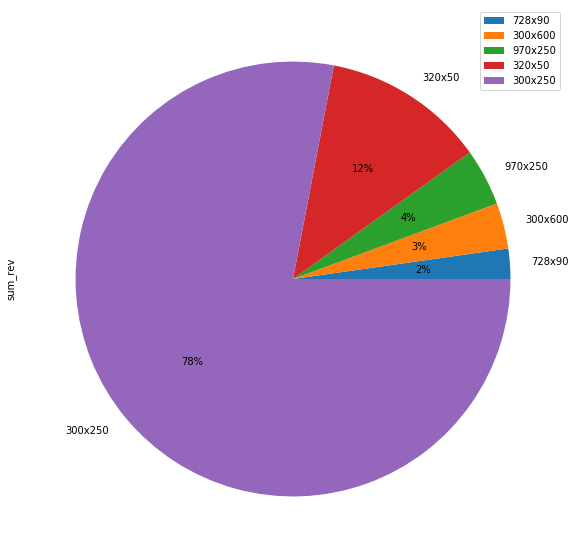

In [223]:
creative_a.plot.pie(y='sum_rev',figsize=(10,10), autopct='%1.0f%%')
plt.show()

In [ ]:
creative_a_imp = df_a.groupby('Creative size').agg(sum_imp=('Ad impressions', sum))

## Device

In [225]:
device_a = df_a.groupby(by='Device categories').agg(sum_rev=('Revenue', sum))

In [228]:
device_a.sort_values('sum_rev',ascending=False)

,sum_rev
Device categories,
High-end mobile devices,1062.42
Desktop,90.91
Tablets,26.43
Connected TV,0.27
